### After understanding the Intution part about Decision Tree Let's understand the implementation part of Decision Tree

**Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset `'health_lifestyle_dataset.csv'` using pandas

In [2]:
df=pd.read_csv("health_lifestyle_dataset.csv")

**View top 5 rows of the dataset.**

In [3]:
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


**Check for total null values present in our dataset**

In [4]:
df.shape

(100000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [6]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


In [7]:
df.describe(include='object')

,gender
count,100000
unique,2
top,Male
freq,50132


<Axes: xlabel='disease_risk', ylabel='count'>

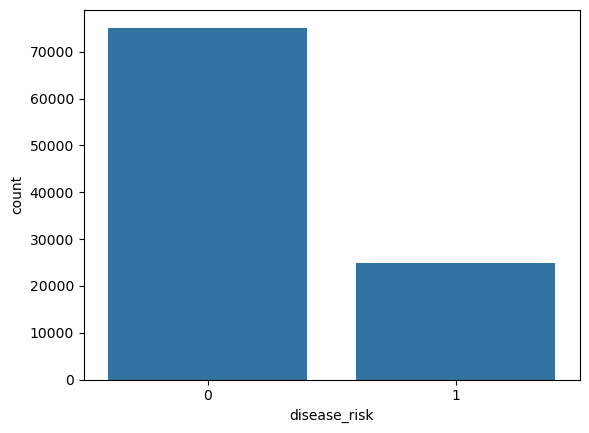

In [8]:
sns.countplot(x='disease_risk',data=df)

<Axes: xlabel='disease_risk', ylabel='count'>

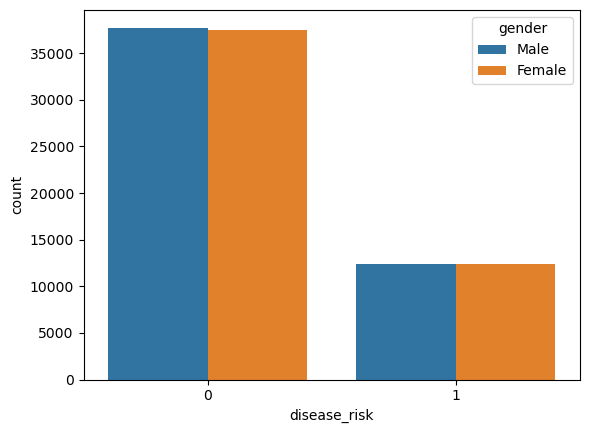

In [9]:
sns.countplot(x='disease_risk',data=df,hue='gender')

In [10]:
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [11]:
df=df.drop('id',axis=1)

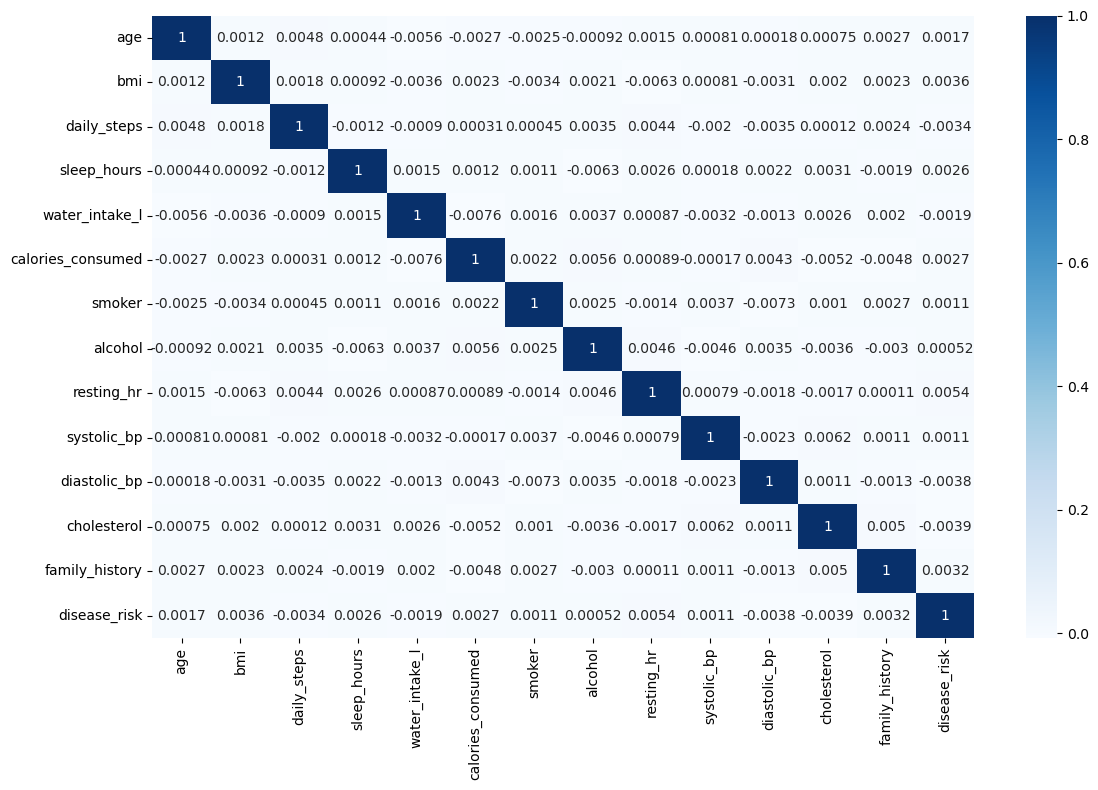

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.tight_layout()

In [13]:
df.columns

Index(['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
       'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk'],
      dtype='object')

In [14]:
df.isnull().sum()

age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

**Now we have a column named as `gender` and this column consist of 'male' and 'female' which is of string datatype so we need to encode this in `0` and `1` for this we will use `LabelEncoder` from `sklearn.preprocessing`**

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
df['gender']=encoder.fit_transform(df['gender'])

In [19]:
df.head()

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,1,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,0,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,1,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,0,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,0,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


Now, let’s divide our dataset into two parts:

**X → Independent variables (features) – the inputs used to make predictions.**

**y → Dependent variable (target) – the output we want to predict.**

In [20]:
x=df.drop('disease_risk',axis=1)
y=df['disease_risk']

**Once we have separated the dataset into X (features) and y (target), the next step is to split the data into training and testing sets, and then use the training set to fit (train) our model.**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

**We initialize a Decision Tree Classifier with entropy as the criterion, a maximum depth of 3, and default values for min_samples_leaf and min_samples_split, while fixing random_state=42 for reproducibility.**

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

**As we have successfully created our model now it's time for training X_train and y_train**

In [25]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

**After training it's time for making prediciton on our decision tree model**

In [26]:
y_pred=model.predict(x_test)

**After makine**

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
accuracy_score(y_test,y_pred)

0.7507272727272727

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
params_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,None],
    'min_samples_split':[2,4,5,6,10],
    'min_samples_leaf':[1,2,4,6]
}

In [38]:
rand_search=RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=params_grid,
    n_iter=100,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

In [39]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 5, 6, 10]},
                   random_state=42, scoring='accuracy')

In [40]:
best_model=rand_search.best_estimator_

In [41]:
pred=best_model.predict(x_test)

In [42]:
accuracy_score(y_test,pred)

0.7507272727272727

In [43]:
df.columns

Index(['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
       'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk'],
      dtype='object')

In [44]:
import pickle

In [45]:
with open('model.pkl','wb') as f:
    pickle.dump('best_model.pkl',f)

In [46]:
with open('encoder.pkl','wb') as f:
    pickle.dump('encoder.pkl',f)

In [47]:
with open("hyper.pkl", "wb") as f:
    pickle.dump(best_model, f)